# 05_05: Weather Charts

In [54]:
# note: this notebook requires Python 3.6 or higher

In [55]:
# 导入数学库
import math
# 导入集合库
import collections
# 导入URL库
import urllib

# 导入numpy库
import numpy as np
# 导入pandas库
import pandas as pd
# 导入matplotlib库
import matplotlib.pyplot as pp

# 在notebook中显示图像
%matplotlib inline


<img src="nytimes.png">

In [56]:
import getweather

In [57]:
# 从1910年到2018年，获取PASADENA地区每年的TMIN和TMAX数据
allyears = np.vstack([getweather.getyear('PASADENA', ['TMIN','TMAX'], year)
                      for year in range(1910, 2019)])


In [58]:
# 使用pp.matshow函数绘制allyears中'TMIN'数据的矩阵图
# extent参数定义了x轴的范围为1到365（一年的天数），y轴的范围为2019到1910（年份的逆序）
pp.matshow(allyears['TMIN'], extent=[1,365,2019,1910])
# 添加颜色条以显示数据值与颜色之间的对应关系
pp.colorbar()

pp.show()


<Figure size 1500x450 with 0 Axes>

<Figure size 1500x450 with 0 Axes>

In [59]:
# 从allyears数据中找到每年的最低温度记录
tmin_record = np.nanmin(allyears['TMIN'], axis=0)

# 从allyears数据中找到每年的最高温度记录
tmax_record = np.nanmax(allyears['TMAX'], axis=0)


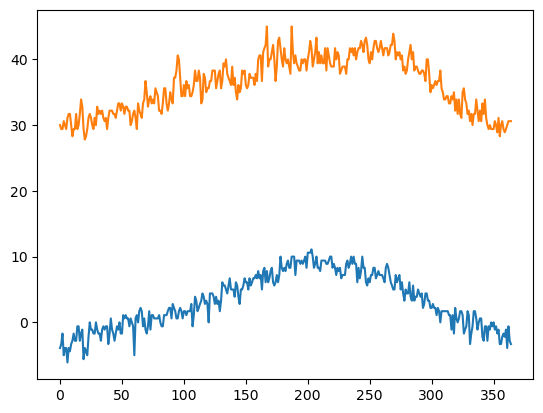

In [60]:
# 使用pp.plot函数绘制每年的最低温度记录
pp.plot(tmin_record)
# 使用pp.plot函数绘制每年的最高温度记录
pp.plot(tmax_record)

# 显示绘制的图表
pp.show()


In [61]:
# 使用列表推导式获取1981年到2010年PASADENA地区每年的TMIN和TMAX数据
# 并使用np.vstack函数将这些数据垂直堆叠起来
normal = np.vstack([getweather.getyear('PASADENA', ['TMIN','TMAX'], year)
                    for year in range(1981, 2011)])


In [62]:
# 计算1981年到2010年PASADENA地区每年的平均最低温度
tmin_normal = np.nanmean(normal['TMIN'], axis=0)

# 计算1981年到2010年PASADENA地区每年的平均最高温度
tmax_normal = np.nanmean(normal['TMAX'], axis=0)

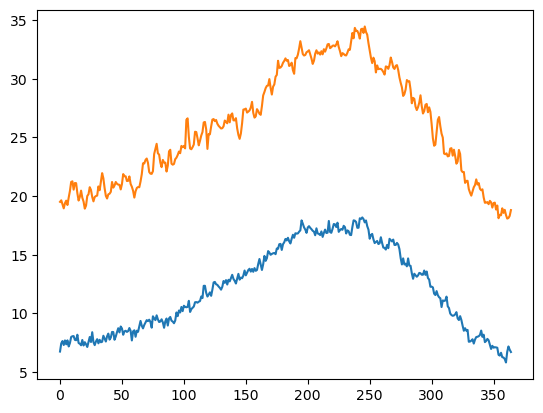

In [63]:
# 使用pp.plot函数绘制1981年到2010年PASADENA地区每年的平均最低温度
pp.plot(tmin_normal)

# 使用pp.plot函数绘制1981年到2010年PASADENA地区每年的平均最高温度
pp.plot(tmax_normal)

# 显示图形
pp.show()


In [64]:
# 定义变量station，赋值为字符串'PASADENA'，表示气象站的名称
station = 'PASADENA'
# 定义变量year，赋值为整数2018，表示年份
year = 2018

# 调用getweather模块中的getyear函数，获取指定气象站在指定年份的天气数据
# 参数['TMIN', 'TMAX']表示获取最低温度和最高温度数据
thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)


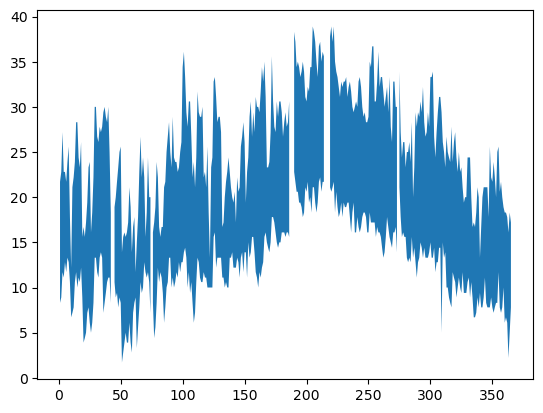

In [65]:
# 创建一个从1到365的数组，表示一年中的每一天
days = np.arange(1, 366)

# 使用pp.fill_between函数绘制2018年PASADENA地区每天的最低温度和最高温度之间的填充区域
pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'])

pp.show()

In [66]:
# 计算2018年PASADENA地区每天的平均温度
# 使用np.nanmean函数计算最低温度和最高温度的平均值
avg = 0.5*(np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))


In [67]:
avg

19.4620142532151

In [68]:
# 使用格式化字符串创建一个字符串，包含气象站名称、年份和平均温度
# 使用f-string格式化字符串，保留两位小数
f'{station}, {year}: average temperature = {avg:.2f} C'


'PASADENA, 2018: average temperature = 19.46 C'

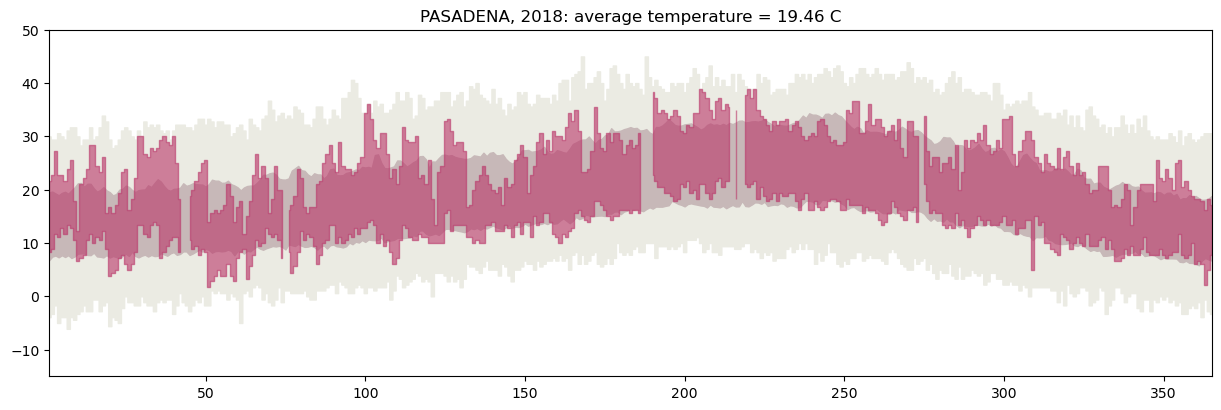

In [69]:
# 创建一个新的图形，设置图形的大小为15x4.5英寸
pp.figure(figsize=(15,4.5))

# 使用fill_between函数绘制每年的最低温度记录和最高温度记录之间的填充区域
# 设置填充颜色为浅灰色，步长为中间值
pp.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid')

# 使用fill_between函数绘制1981年到2010年的平均最低温度和平均最高温度之间的填充区域
# 设置填充颜色为深灰色
pp.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72))

# 使用fill_between函数绘制2018年的最低温度和最高温度之间的填充区域
# 设置填充颜色为红色，透明度为0.6，步长为中间值
pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'],
                color=(0.73,0.21,0.41), alpha=0.6, step='mid')

# 设置图形的坐标轴范围
# x轴范围为1到365，y轴范围为-15到50
pp.axis(xmin=1, xmax=365, ymin=-15, ymax=50)

# 设置图形的标题
# 标题内容为气象站名称、年份和平均温度
pp.title(f'{station}, {year}: average temperature = {avg:.2f} C')

# 显示图形
pp.show()


In [72]:
def nyplot(station, year):
    """
    绘制指定气象站在指定年份的温度图表

    参数:
    station (str): 气象站名称
    year (int): 年份

    返回:
    None
    """
    # 创建一个新的图形，设置图形的大小为15x4.5英寸
    pp.figure(figsize=(15,4.5))
    
    # 使用列表推导式获取1910年到2019年PASADENA地区每年的TMIN和TMAX数据
    # 并使用np.vstack函数将这些数据垂直堆叠起来
    allyears = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                          for year in range(1910, 2020)])
    
    # 使用列表推导式获取1981年到2010年PASADENA地区每年的TMIN和TMAX数据
    # 并使用np.vstack函数将这些数据垂直堆叠起来
    normal = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                        for year in range(1981, 2011)])

    # 计算1910年到2019年PASADENA地区每年的最低温度记录
    tmin_record, tmax_record = np.nanmin(allyears['TMIN'], axis=0), np.nanmax(allyears['TMAX'], axis=0)
    
    # 计算1981年到2010年PASADENA地区每年的平均最低温度和平均最高温度
    tmin_normal, tmax_normal = np.nanmean(normal['TMIN'], axis=0), np.nanmean(normal['TMAX'], axis=0)

    # 创建一个从1到365的数组，表示一年中的每一天
    days = np.arange(1, 366)

    # 使用fill_between函数绘制每年的最低温度记录和最高温度记录之间的填充区域
    # 设置填充颜色为浅灰色，步长为中间值
    pp.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid')
    
    # 使用fill_between函数绘制1981年到2010年的平均最低温度和平均最高温度之间的填充区域
    # 设置填充颜色为深灰色
    pp.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72))
    
    # 调用getweather模块中的getyear函数，获取指定气象站在指定年份的天气数据
    # 参数['TMIN', 'TMAX']表示获取最低温度和最高温度数据
    thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)

    # 使用fill_between函数绘制2018年的最低温度和最高温度之间的填充区域
    # 设置填充颜色为红色，透明度为0.6，步长为中间值
    pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], color=(0.73,0.21,0.41), alpha=0.6, step='mid')

    # 设置图形的坐标轴范围
    # x轴范围为1到365，y轴范围为-15到50
    pp.axis(xmin=1, xmax=365, ymin=-15, ymax=50)
    
    # 计算2018年PASADENA地区每天的平均温度
    # 使用np.nanmean函数计算最低温度和最高温度的平均值
    avg = 0.5*(np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))
    
    # 设置图形的标题
    # 标题内容为气象站名称、年份和平均温度
    pp.title(f'{station}, {year}: average temperature = {avg:.2f} C')



In [73]:
nyplot('NEW YORK', 2018)

KeyError: "['TMIN', 'TMAX'] not in index"